In [1]:
from pandas import read_csv
from scripts.dataset_analyse import (
    counter_columns,
    lowest_and_biggest_correlation,
    print_unique_values,
    hisplot_columns,
    find_dataframe_outliers,
)

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataframe = read_csv("../data/raw/marketing_campaign.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
NUMERICAL_COLUMNS = [
    column
    for column in dataframe.columns
    if dataframe[column].dtype in ("int64", "float64")
]
CATEGORICAL_COLUMNS = [
    column for column in dataframe.columns if dataframe[column].dtype in ("object",)
]

In [4]:
print_unique_values(dataframe, CATEGORICAL_COLUMNS)

the unique values for the column Education are : 
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

the unique values for the column Marital_Status are : 
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

the unique values for the column Dt_Customer are : 
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-

# Dataframe content
The dataframe is composed of **29 features** and **2240 observations**, it is a small dataset.  
Among the features, 3 are categoricals, the others are quantitatives.  
Among the categorical features, **Dt_Customer** is a timestamp column.  
There are only missing values in the *Income* feature, with **24 observations** missing.  

***
## Repartition analysis

In [5]:
print_unique_values(dataframe, ["Z_CostContact", "Z_Revenue"])

the unique values for the column Z_CostContact are : 
[3]

the unique values for the column Z_Revenue are : 
[11]



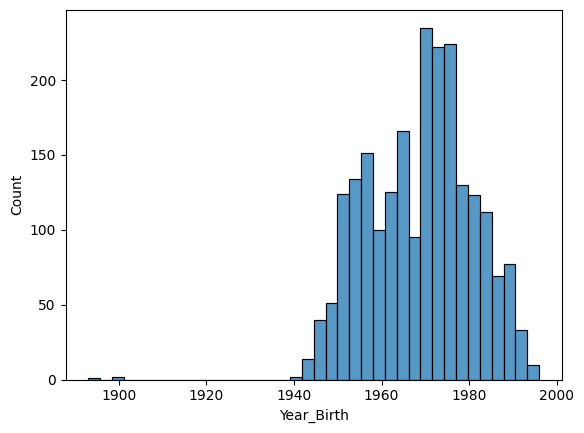

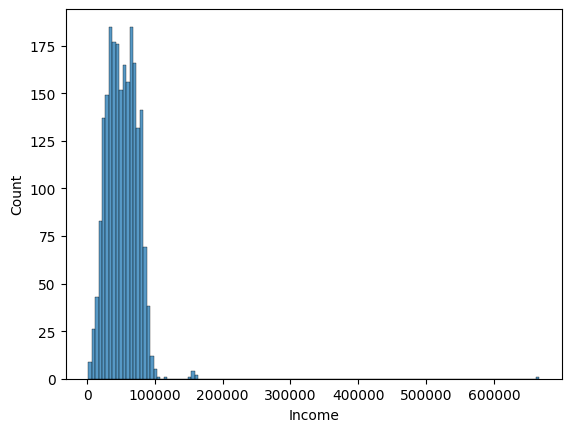

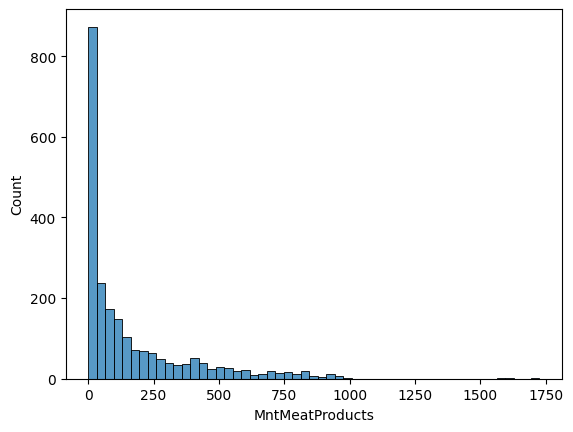

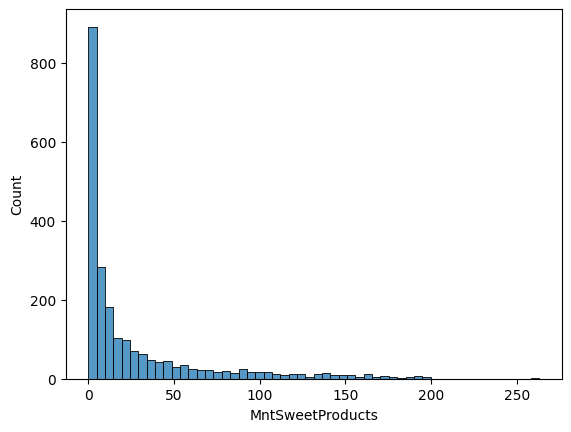

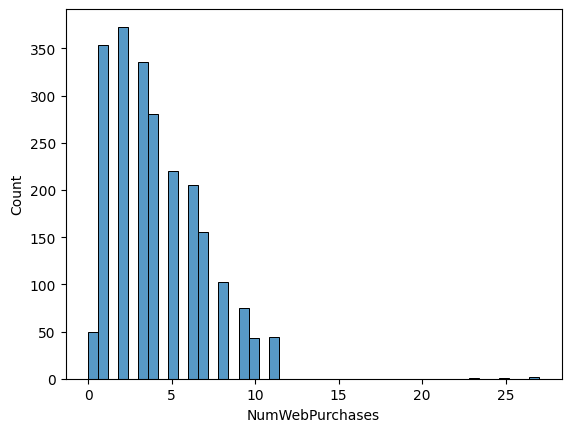

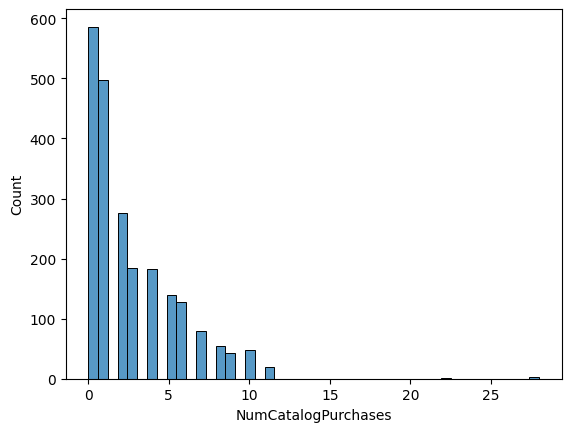

In [6]:
histplot_column = [
    "Year_Birth",
    "Income",
    "MntMeatProducts",
    "MntSweetProducts",
    "NumWebPurchases",
    "NumCatalogPurchases",
]
hisplot_columns(dataframe, histplot_column)

## More charts 
All the histplot charts for all the features are in the folder [charts/]('../charts/').  
The more relevant for the exploratory are the one bellow.  

In [7]:
need_counter_columns = [
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Teenhome",
    "Kidhome",
]
counter_columns(dataframe, need_counter_columns)

The counter of Complain is : Counter({0: 2219, 1: 21})
The counter of AcceptedCmp1 is : Counter({0: 2096, 1: 144})
The counter of AcceptedCmp2 is : Counter({0: 2210, 1: 30})
The counter of AcceptedCmp3 is : Counter({0: 2077, 1: 163})
The counter of AcceptedCmp4 is : Counter({0: 2073, 1: 167})
The counter of AcceptedCmp5 is : Counter({0: 2077, 1: 163})
The counter of Teenhome is : Counter({0: 1158, 1: 1030, 2: 52})
The counter of Kidhome is : Counter({0: 1293, 1: 899, 2: 48})


In [14]:
outliers_columns = [
    "Year_Birth",
    "Income",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumWebVisitsMonth",
]
find_dataframe_outliers(dataframe, outliers_columns, 90)

Data points considered outliers for the column Year_Birth:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


Data points considered outliers for the column Income:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


Data points considered outliers for the column MntWines:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Data points considered outliers for the column MntFruits:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Data points considered outliers for the column MntMeatProducts:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0


Data points considered outliers for the column MntFishProducts:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Data points considered outliers for the column MntSweetProducts:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1898,4619,1945,PhD,Single,113734.0,0,0,28-05-2014,9,6,...,1,0,0,0,0,0,0,3,11,0


Data points considered outliers for the column MntGoldProds:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,...,1,0,0,0,0,0,0,3,11,0


Data points considered outliers for the column NumDealsPurchases:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
287,8148,1956,Master,Together,50898.0,1,1,08-01-2013,88,285,...,5,0,0,0,0,0,0,3,11,0
432,238,1967,2n Cycle,Together,67309.0,1,1,23-01-2013,76,515,...,7,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,18-09-2012,62,73,...,19,0,0,0,0,0,0,3,11,0
1147,5430,1956,Graduation,Together,54450.0,1,1,14-09-2012,0,454,...,8,0,0,0,0,0,0,3,11,0
1161,8432,1956,Graduation,Together,54450.0,1,1,14-09-2012,0,454,...,8,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,...,20,0,0,0,0,0,0,3,11,0
1503,3594,1973,Master,Married,54108.0,1,1,05-11-2012,74,539,...,8,0,0,0,0,0,0,3,11,0


Data points considered outliers for the column NumWebPurchases:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1806,6237,1966,PhD,Single,7144.0,0,2,07-12-2013,92,81,...,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,28-05-2014,9,6,...,1,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,...,1,0,0,0,0,0,0,3,11,0


Data points considered outliers for the column NumCatalogPurchases:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0


Data points considered outliers for the column NumWebVisitsMonth:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,08-12-2012,76,107,...,20,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,18-09-2012,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,...,20,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,...,19,0,0,0,0,0,0,3,11,0


[[192, 239, 339],
 [2233],
 [],
 [],
 [21, 164, 687, 1653],
 [],
 [1898],
 [1975],
 [21, 164, 287, 432, 687, 1042, 1147, 1161, 1245, 1503, 1525, 1788, 1846],
 [1806, 1898, 1975],
 [21, 164, 687, 1653],
 [9, 774, 1042, 1245, 1846]]

### Analysis
There are some features, as **Year_Birth** or **Income**, that contains outliers.  
There are some features, as **Complain** or **Teenhome**, that are unbalanced.  
There are some features, **Z_CostContact** and **Z_Revenue**, with only one unique value.  
***

<Axes: >

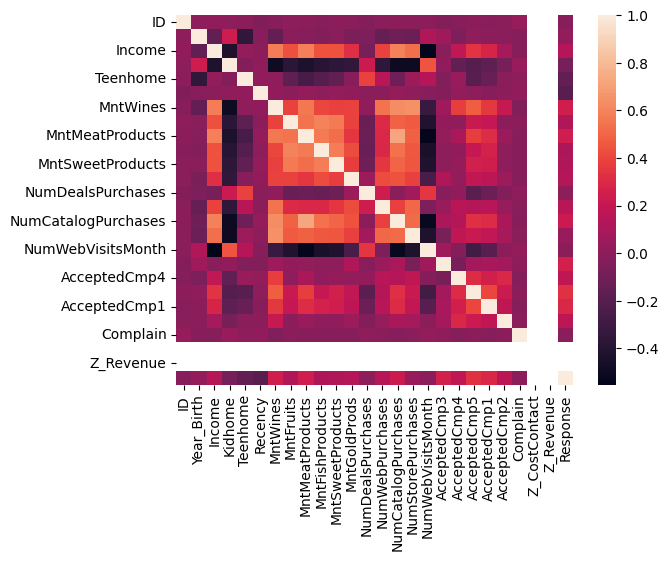

In [9]:
from seaborn import heatmap

dataframe_numerical = dataframe[NUMERICAL_COLUMNS]
dataframe_numerical_matrix = dataframe_numerical.corr()
heatmap(dataframe_numerical_matrix)

<Axes: >

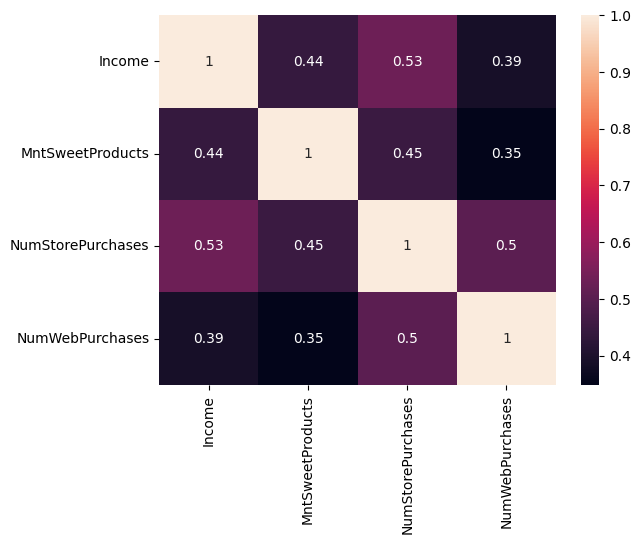

In [10]:
correlation_columns = [
    "Income",
    "MntSweetProducts",
    "NumStorePurchases",
    "NumWebPurchases",
]
dataframe_best_matrix = dataframe[correlation_columns].corr()
heatmap(dataframe_best_matrix, annot=True)

In [11]:
dataframe_best_matrix

,Income,MntSweetProducts,NumStorePurchases,NumWebPurchases
Income,1.000000,0.440744,0.529362,0.387878
MntSweetProducts,0.440744,1.000000,0.448756,0.348544
NumStorePurchases,0.529362,0.448756,1.000000,0.502713
NumWebPurchases,0.387878,0.348544,0.502713,1.000000


In [12]:
lowest_and_biggest_correlation(dataframe_numerical_matrix)

The lowest correlation is -0.5530880116530972
The biggest correlation is 0.7238265908738767


(-0.5530880116530972, 0.7238265908738767)

### Analysis
As we can observ, the correlation between some variables are very intersting.  
However the correlation are not big enough to drop column, they will be usefull to profilizing.  
***